<a href="https://colab.research.google.com/github/fzanart/Socialz/blob/main/anomaly_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive/')
import json
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.manifold import TSNE

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [50]:
df = pd.read_csv('/content/drive/MyDrive/Socialz/cobol_pullrequests.csv')
df

,type,login,name,created_at,payload,lang,event,user_login,user_type,url,commits,additions,deletions,changed_files
0,PullRequestEvent,vim-sroberge,vimaec/g3d,2021-06-16 15:38:18 UTC,"{""action"":""closed"",""number"":3,""pull_request"":{...","""COBOL""","""closed""","""vim-sroberge""","""User""","""https://api.github.com/repos/vimaec/g3d/pulls/3""",1,2,2,1
1,PullRequestEvent,vim-sroberge,vimaec/g3d,2021-06-16 15:28:12 UTC,"{""action"":""opened"",""number"":3,""pull_request"":{...","""COBOL""","""opened""","""vim-sroberge""","""User""","""https://api.github.com/repos/vimaec/g3d/pulls/3""",1,2,2,1
2,PullRequestEvent,vim-sroberge,vimaec/g3d,2021-06-16 16:19:54 UTC,"{""action"":""closed"",""number"":4,""pull_request"":{...","""COBOL""","""closed""","""vim-sroberge""","""User""","""https://api.github.com/repos/vimaec/g3d/pulls/4""",1,23,11,1
3,PullRequestEvent,vim-sroberge,vimaec/g3d,2021-06-16 15:37:56 UTC,"{""action"":""opened"",""number"":4,""pull_request"":{...","""COBOL""","""opened""","""vim-sroberge""","""User""","""https://api.github.com/repos/vimaec/g3d/pulls/4""",1,23,11,1
4,PullRequestEvent,mavimaec,vimaec/g3d,2021-11-19 20:40:52 UTC,"{""action"":""closed"",""number"":8,""pull_request"":{...","""COBOL""","""closed""","""mavimaec""","""User""","""https://api.github.com/repos/vimaec/g3d/pulls/8""",2,113,702,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1328,PullRequestEvent,joe-tingsanchali-sonarsource,SonarSource/sonar-scanning-examples,2021-05-14 03:43:29 UTC,"{""action"":""closed"",""number"":115,""pull_request""...","""COBOL""","""closed""","""joe-tingsanchali-sonarsource""","""User""","""https://api.github.com/repos/SonarSource/sona...",1,688,1,39
1329,PullRequestEvent,joe-tingsanchali-sonarsource,SonarSource/sonar-scanning-examples,2021-12-06 17:56:00 UTC,"{""action"":""closed"",""number"":127,""pull_request""...","""COBOL""","""closed""","""joe-tingsanchali-sonarsource""","""User""","""https://api.github.com/repos/SonarSource/sona...",1,506,0,15
1330,PullRequestEvent,joe-tingsanchali-sonarsource,SonarSource/sonar-scanning-examples,2021-11-30 22:12:33 UTC,"{""action"":""opened"",""number"":127,""pull_request""...","""COBOL""","""opened""","""joe-tingsanchali-sonarsource""","""User""","""https://api.github.com/repos/SonarSource/sona...",1,506,0,15
1331,PullRequestEvent,joe-tingsanchali-sonarsource,SonarSource/sonar-scanning-examples,2021-12-09 04:01:35 UTC,"{""action"":""closed"",""number"":128,""pull_request""...","""COBOL""","""closed""","""joe-tingsanchali-sonarsource""","""User""","""https://api.github.com/repos/SonarSource/sona...",1,5,1,1


In [51]:
def text_lenght(text):

    if text == None:

        return 0
    else:

        return len(text)

df['payload'] = df['payload'].apply(json.loads)
df['merged'] = df['payload'].apply(lambda x: x.get('pull_request').get('merged'))
df['comments'] = df['payload'].apply(lambda x: x.get('pull_request').get('comments'))
df['review_comments'] = df['payload'].apply(lambda x: x.get('pull_request').get('review_comments'))
df['title lenght'] = df['payload'].apply(lambda x: text_lenght(x.get('pull_request').get('title')))
df['body lenght'] = df['payload'].apply(lambda x: text_lenght(x.get('pull_request').get('body')))
#df['total LOC'] = df['additions'] + df['deletions']

In [52]:
df

,type,login,name,created_at,payload,lang,event,user_login,user_type,url,commits,additions,deletions,changed_files,merged,comments,review_comments,title lenght,body lenght
0,PullRequestEvent,vim-sroberge,vimaec/g3d,2021-06-16 15:38:18 UTC,"{'action': 'closed', 'number': 3, 'pull_reques...","""COBOL""","""closed""","""vim-sroberge""","""User""","""https://api.github.com/repos/vimaec/g3d/pulls/3""",1,2,2,1,False,0,0,15,0
1,PullRequestEvent,vim-sroberge,vimaec/g3d,2021-06-16 15:28:12 UTC,"{'action': 'opened', 'number': 3, 'pull_reques...","""COBOL""","""opened""","""vim-sroberge""","""User""","""https://api.github.com/repos/vimaec/g3d/pulls/3""",1,2,2,1,False,0,0,15,0
2,PullRequestEvent,vim-sroberge,vimaec/g3d,2021-06-16 16:19:54 UTC,"{'action': 'closed', 'number': 4, 'pull_reques...","""COBOL""","""closed""","""vim-sroberge""","""User""","""https://api.github.com/repos/vimaec/g3d/pulls/4""",1,23,11,1,True,0,0,12,83
3,PullRequestEvent,vim-sroberge,vimaec/g3d,2021-06-16 15:37:56 UTC,"{'action': 'opened', 'number': 4, 'pull_reques...","""COBOL""","""opened""","""vim-sroberge""","""User""","""https://api.github.com/repos/vimaec/g3d/pulls/4""",1,23,11,1,False,0,0,12,83
4,PullRequestEvent,mavimaec,vimaec/g3d,2021-11-19 20:40:52 UTC,"{'action': 'closed', 'number': 8, 'pull_reques...","""COBOL""","""closed""","""mavimaec""","""User""","""https://api.github.com/repos/vimaec/g3d/pulls/8""",2,113,702,16,True,0,0,15,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1328,PullRequestEvent,joe-tingsanchali-sonarsource,SonarSource/sonar-scanning-examples,2021-05-14 03:43:29 UTC,"{'action': 'closed', 'number': 115, 'pull_requ...","""COBOL""","""closed""","""joe-tingsanchali-sonarsource""","""User""","""https://api.github.com/repos/SonarSource/sona...",1,688,1,39,True,0,0,75,155
1329,PullRequestEvent,joe-tingsanchali-sonarsource,SonarSource/sonar-scanning-examples,2021-12-06 17:56:00 UTC,"{'action': 'closed', 'number': 127, 'pull_requ...","""COBOL""","""closed""","""joe-tingsanchali-sonarsource""","""User""","""https://api.github.com/repos/SonarSource/sona...",1,506,0,15,True,0,1,65,114
1330,PullRequestEvent,joe-tingsanchali-sonarsource,SonarSource/sonar-scanning-examples,2021-11-30 22:12:33 UTC,"{'action': 'opened', 'number': 127, 'pull_requ...","""COBOL""","""opened""","""joe-tingsanchali-sonarsource""","""User""","""https://api.github.com/repos/SonarSource/sona...",1,506,0,15,False,0,0,65,0
1331,PullRequestEvent,joe-tingsanchali-sonarsource,SonarSource/sonar-scanning-examples,2021-12-09 04:01:35 UTC,"{'action': 'closed', 'number': 128, 'pull_requ...","""COBOL""","""closed""","""joe-tingsanchali-sonarsource""","""User""","""https://api.github.com/repos/SonarSource/sona...",1,5,1,1,True,0,0,52,1092


In [53]:
columns = ['commits', 'additions', 'deletions','changed_files', 'comments', 'review_comments','title lenght', 'body lenght'] # 'total LOC'

X_train = df[df['merged'] == True]
X_train = X_train[columns]
X_train

,commits,additions,deletions,changed_files,comments,review_comments,title lenght,body lenght
2,1,23,11,1,0,0,12,83
4,2,113,702,16,0,0,15,0
6,1,254,2137823,696,0,0,42,157
9,1,8,2,3,0,0,29,148
11,6,1412,117,13,0,0,8,0
...,...,...,...,...,...,...,...,...
1319,1,1,1,1,0,0,33,0
1321,2,0,0,0,0,0,24,40
1328,1,688,1,39,0,0,75,155
1329,1,506,0,15,0,1,65,114


In [54]:
X_test = df[df['merged'] == False]
X_test = X_test[columns]
X_test

,commits,additions,deletions,changed_files,comments,review_comments,title lenght,body lenght
0,1,2,2,1,0,0,15,0
1,1,2,2,1,0,0,15,0
3,1,23,11,1,0,0,12,83
5,2,113,702,16,0,0,15,0
7,1,254,2137823,696,0,0,42,157
...,...,...,...,...,...,...,...,...
1325,3,685,0,38,0,0,49,0
1326,3,685,0,38,0,0,49,0
1327,1,688,1,39,0,0,76,145
1330,1,506,0,15,0,0,65,0


In [55]:
clf = IsolationForest(max_samples='auto', n_jobs=-1, random_state=42)
clf.fit(X_train)
y_pred_train = clf.fit_predict(X_train)
y_pred_test = clf.decision_function(X_test)

In [56]:
len(y_pred_test)

781

decision_function(X)

Average anomaly score of X of the base classifiers.

The anomaly score of an input sample is computed as the mean anomaly score of the trees in the forest.

In [57]:
y_pred_test[y_pred_test<0]

array([-0.2373482 , -0.12869505, -0.10883896, -0.10883896, -0.02437174,
       -0.04239596, -0.1078163 , -0.22351199, -0.00436584, -0.17113987,
       -0.16757685, -0.04738643, -0.05771369, -0.00836683, -0.09849874,
       -0.10843683, -0.10843683, -0.07405969, -0.29855938, -0.05239649,
       -0.06794374, -0.18567728, -0.04098903, -0.08302587, -0.00265013,
       -0.01375394, -0.08223747, -0.08223747, -0.0601398 , -0.08223747,
       -0.08223747, -0.0601398 , -0.0601398 , -0.08223747, -0.00908131,
       -0.03071648, -0.08223747, -0.0601398 , -0.0601398 , -0.08223747,
       -0.02496334, -0.0601398 , -0.08223747, -0.0601398 , -0.0531159 ,
       -0.08302587, -0.06089828, -0.16488367, -0.1740122 ])

In [58]:
# Predict returns -1 for outliers and 1 for inliers.
y_pred_test = clf.predict(X_test)
anomaly = np.concatenate([y_pred_train,y_pred_test])
X_train['Data'] = 1
X_test['Data'] = 0
data = pd.concat([X_train, X_test])
data['Anomaly'] = anomaly
data

,commits,additions,deletions,changed_files,comments,review_comments,title lenght,body lenght,Data,Anomaly
2,1,23,11,1,0,0,12,83,1,1
4,2,113,702,16,0,0,15,0,1,1
6,1,254,2137823,696,0,0,42,157,1,-1
9,1,8,2,3,0,0,29,148,1,1
11,6,1412,117,13,0,0,8,0,1,1
...,...,...,...,...,...,...,...,...,...,...
1325,3,685,0,38,0,0,49,0,0,1
1326,3,685,0,38,0,0,49,0,0,1
1327,1,688,1,39,0,0,76,145,0,1
1330,1,506,0,15,0,0,65,0,0,1


In [59]:
tsne = TSNE(n_components=2, random_state=0)
projections = tsne.fit_transform(data[columns])

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


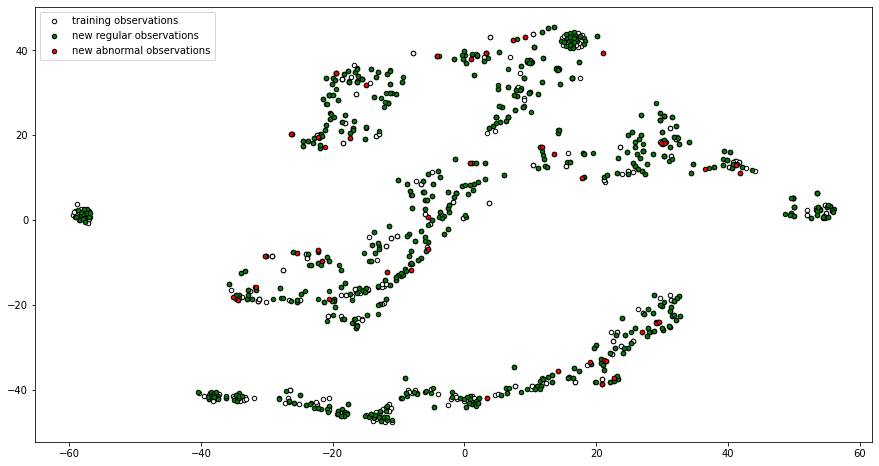

In [60]:
plt.figure(figsize=(15,8))
indices_a = data[data['Data'] == 1].index.to_list() # Select training observations
indices_b = data[(data['Data'] == 0) & (data['Anomaly'] == 1)].index.to_list() # Select new regular observations
indices_c = data[(data['Data'] == 0) & (data['Anomaly'] == -1)].index.to_list() # Select new abnormal observations
a = plt.scatter(np.take(projections[:,0], indices_a), np.take(projections[:,1], indices_a) , c="white", s=20, edgecolor="k")
b = plt.scatter(np.take(projections[:,0], indices_b), np.take(projections[:,1], indices_b) , c="green", s=20, edgecolor="k")
c = plt.scatter(np.take(projections[:,0], indices_c), np.take(projections[:,1], indices_c) , c="red", s=20, edgecolor="k")
plt.legend(
    [a, b, c],
    ["training observations", "new regular observations", "new abnormal observations"],
    loc="upper left")


plt.show()

In [61]:
df['login'].mode()

0    ralphnuessecpwr
dtype: object

In [62]:
X_train_sample = df[(df['login']=='ralphnuessecpwr')&(df['merged'] == True)]
X_train_sample = X_train_sample[columns]
X_test_sample = df[(df['login']=='ralphnuessecpwr')&(df['merged'] == False)]
X_test_sample = X_test_sample[columns]

In [63]:
clf = IsolationForest(max_samples='auto', n_jobs=-1, random_state=42)
clf.fit(X_train_sample)
anomaly = np.concatenate([clf.fit_predict(X_train_sample),clf.predict(X_test_sample)])
X_train_sample['Data'] = 1
X_test_sample['Data'] = 0
data = pd.concat([X_train_sample, X_test_sample])
data['Anomaly'] = anomaly

data = data.reset_index(drop=True)

tsne = TSNE(n_components=2, random_state=0)
projections = tsne.fit_transform(data[columns])

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


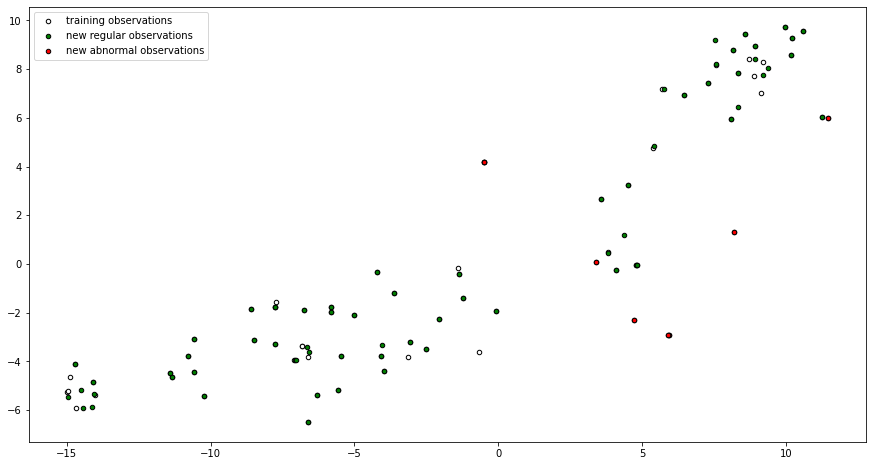

In [75]:
plt.figure(figsize=(15,8))
indices_a = data[data['Data'] == 1].index.to_list() # Select training observations
indices_b = data[(data['Data'] == 0) & (data['Anomaly'] == 1)].index.to_list() # Select new regular observations
indices_c = data[(data['Data'] == 0) & (data['Anomaly'] == -1)].index.to_list() # Select new abnormal observations
a = plt.scatter(np.take(projections[:,0], indices_a), np.take(projections[:,1], indices_a) , c="white", s=20, edgecolor="k")
b = plt.scatter(np.take(projections[:,0], indices_b), np.take(projections[:,1], indices_b) , c="green", s=20, edgecolor="k")
c = plt.scatter(np.take(projections[:,0], indices_c), np.take(projections[:,1], indices_c) , c="red", s=20, edgecolor="k")
plt.legend(
    [a, b, c],
    ["training observations", "new regular observations", "new abnormal observations"],
    loc="upper left")


plt.show()

In [65]:
data

,commits,additions,deletions,changed_files,comments,review_comments,title lenght,body lenght,Data,Anomaly
0,14,181,30,17,0,0,24,0,1,-1
1,9,4,3,3,0,0,24,0,1,1
2,10,4,3,3,0,0,11,0,1,1
3,1,1,0,1,0,0,4,0,1,1
4,23,13,1679,16,0,0,24,0,1,-1
...,...,...,...,...,...,...,...,...,...,...
147,4,14,14,14,0,0,11,0,0,1
148,4,2,1,1,0,0,11,0,0,1
149,1,33,13,6,0,0,4,0,0,-1
150,1,1,1,1,0,0,4,0,0,1


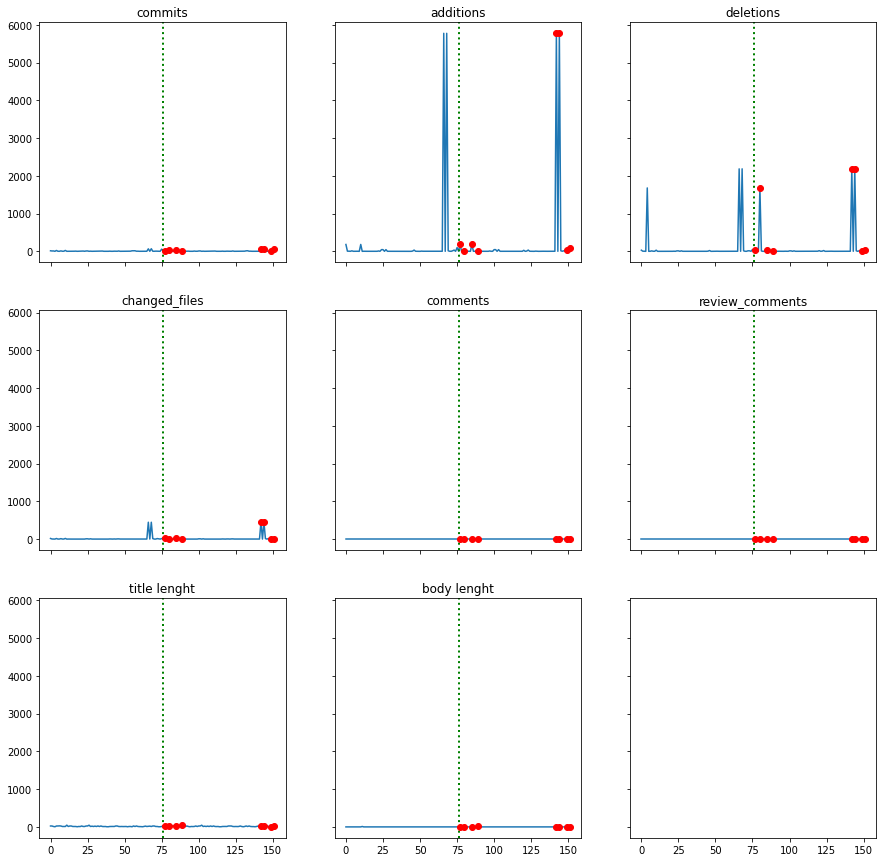

In [74]:
markers_on = data[(data['Data'] == 0) & (data['Anomaly'] == -1)].index.to_list()
train_mark = len(data[data['Data'] == 1])

f,axs = plt.subplots(3,3,sharex=True, sharey=True,figsize=(15,15))

for column, ax in zip(columns, axs.ravel()):
  ax.plot(data[column])
  ax.axvline(x=train_mark, color='green', ls=':', lw=2)
  ax.plot(data[column], 'ro', markevery=markers_on)
  ax.title.set_text(column)

plt.show()